In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
%cd "gdrive/My Drive/Colab Notebooks/dataset"

/content/gdrive/My Drive/Colab Notebooks/dataset


In [ ]:
import os
import tensorflow as tf
os.listdir('Fruits')

['FreshOrange',
 'FreshStrawberry',
 'FreshMango',
 'RottenOrange',
 'RottenStrawberry',
 'RottenBanana',
 'FreshBanana',
 'FreshApple',
 'RottenApple',
 'RottenMango']

In [ ]:
base_dir ='Fruits'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode='nearest',
                    validation_split=0.2
                    )

train_generator = train_datagen.flow_from_directory(
                      base_dir, 
                      target_size= (150, 150),  
                      batch_size= 32,
                      shuffle = True,
                      subset = 'training',
                      class_mode= 'categorical' 
                      )


validation_generator = train_datagen.flow_from_directory(
                          base_dir, 
                          target_size= (150, 150),
                          batch_size= 32, 
                          shuffle = True,
                          subset = 'validation',
                          class_mode= 'categorical'
                          )

Found 4795 images belonging to 10 classes.
Found 1193 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization



model = tf.keras.models.Sequential([
    #layer 
    #base_model,
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #layer 2
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #layer3
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #layer4
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 512)      0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.optimizers.Adam(), 
              metrics= ['accuracy'])


In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nakurasi lebih besar dari 96%. maka training berhenti!") 
            self.model.stop_training = True 
 
callbacks = myCallback()

In [ ]:
history = model.fit(
          train_generator,
          epochs=30, 
          steps_per_epoch=len(train_generator),
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          verbose=2,
          callbacks = [callbacks])

Epoch 1/30
150/150 - 1816s - loss: 2.2529 - accuracy: 0.1625 - val_loss: 2.1459 - val_accuracy: 0.2942 - 1816s/epoch - 12s/step
Epoch 2/30
150/150 - 56s - loss: 1.8371 - accuracy: 0.3210 - val_loss: 1.7643 - val_accuracy: 0.3428 - 56s/epoch - 376ms/step
Epoch 3/30
150/150 - 56s - loss: 1.4818 - accuracy: 0.4555 - val_loss: 1.5066 - val_accuracy: 0.4325 - 56s/epoch - 376ms/step
Epoch 4/30
150/150 - 57s - loss: 1.2502 - accuracy: 0.5550 - val_loss: 1.3411 - val_accuracy: 0.5038 - 57s/epoch - 379ms/step
Epoch 5/30
150/150 - 57s - loss: 1.0419 - accuracy: 0.6282 - val_loss: 1.2246 - val_accuracy: 0.5599 - 57s/epoch - 379ms/step
Epoch 6/30
150/150 - 56s - loss: 0.8535 - accuracy: 0.7057 - val_loss: 0.9953 - val_accuracy: 0.6370 - 56s/epoch - 375ms/step
Epoch 7/30
150/150 - 56s - loss: 0.7413 - accuracy: 0.7433 - val_loss: 0.8732 - val_accuracy: 0.6815 - 56s/epoch - 376ms/step
Epoch 8/30
150/150 - 56s - loss: 0.6708 - accuracy: 0.7773 - val_loss: 0.6650 - val_accuracy: 0.7552 - 56s/epoch - 3

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
%matplotlib inline

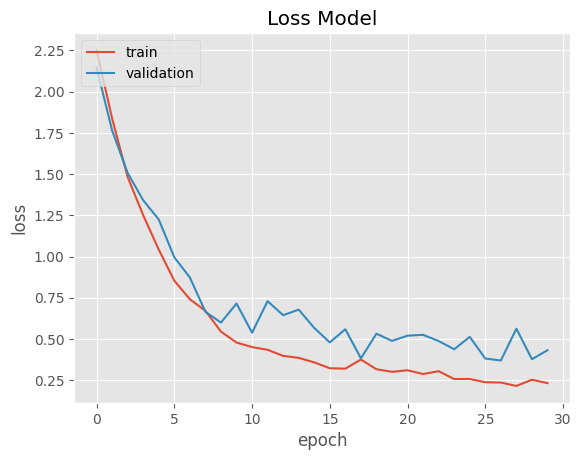

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

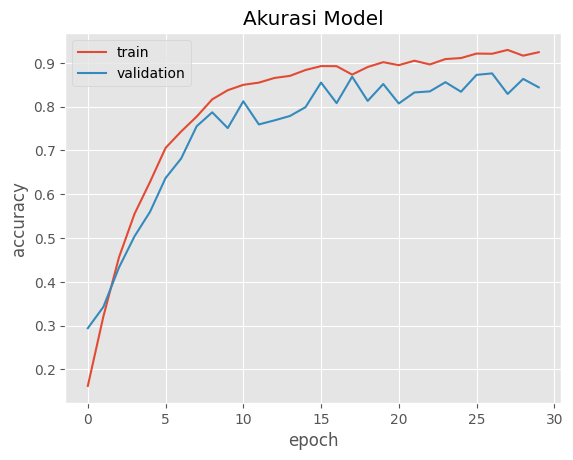

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss = model.evaluate(validation_generator, steps=len(validation_generator))

38/38 [==============================] - 11s 294ms/step - loss: 0.4560 - accuracy: 0.8416


In [ ]:
size_input = (150, 150)
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=size_input+(3,),
    include_top=False  # Do not include the ImageNet classifier at the top.
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = True

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5), # Low learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
)

Epoch 1/30
150/150 [==============================] - 102s 471ms/step - loss: 1.9374 - categorical_accuracy: 0.3616 - val_loss: 1.8130 - val_categorical_accuracy: 0.4241
Epoch 2/30
150/150 [==============================] - 59s 392ms/step - loss: 0.9383 - categorical_accuracy: 0.7343 - val_loss: 1.3963 - val_categorical_accuracy: 0.5566
Epoch 3/30
150/150 [==============================] - 58s 388ms/step - loss: 0.5863 - categorical_accuracy: 0.8478 - val_loss: 1.1194 - val_categorical_accuracy: 0.6303
Epoch 4/30
150/150 [==============================] - 58s 385ms/step - loss: 0.4288 - categorical_accuracy: 0.8836 - val_loss: 0.9415 - val_categorical_accuracy: 0.6882
Epoch 5/30
150/150 [==============================] - 58s 386ms/step - loss: 0.3295 - categorical_accuracy: 0.9120 - val_loss: 0.7563 - val_categorical_accuracy: 0.7452
Epoch 6/30
150/150 [==============================] - 59s 393ms/step - loss: 0.2628 - categorical_accuracy: 0.9230 - val_loss: 0.6134 - val_categorical_ac

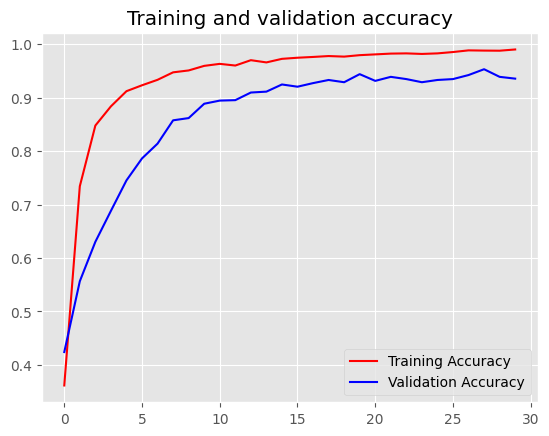

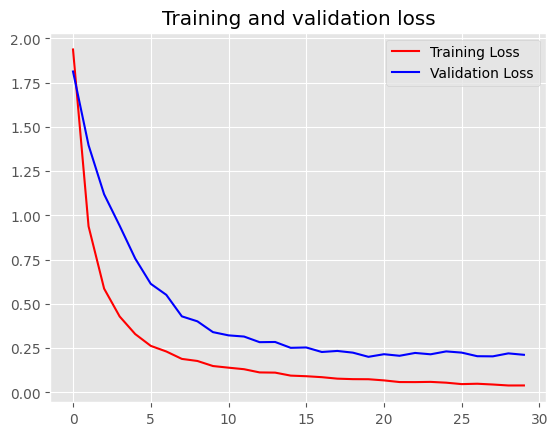

In [ ]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
loss = model.evaluate(validation_generator, steps=len(validation_generator))

38/38 [==============================] - 11s 296ms/step - loss: 0.1987 - categorical_accuracy: 0.9447


In [ ]:
print(train_generator.class_indices)

{'FreshApple': 0, 'FreshBanana': 1, 'FreshMango': 2, 'FreshOrange': 3, 'FreshStrawberry': 4, 'RottenApple': 5, 'RottenBanana': 6, 'RottenMango': 7, 'RottenOrange': 8, 'RottenStrawberry': 9}


In [ ]:
model.save("model_cnn_fruit.pb")